In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import json

import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [5]:
from IPython.core.display import display, HTML
display(HTML('<h1><center>Data Visualization On Trending YouTube Videos</center></h1>'))

In [32]:
display(HTML('<p><h4><center>Trending YouTube Dataset In United States Country</center></h4></p>'))

In [7]:
df = pd.read_csv('Desktop/Python Dataset/usvideos.csv')

In [8]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [45]:
display(HTML('<p><h4>The data above shows data on current celebrity videos for the United States. This data will be analyzed by researchers to get observations about the flow of YouTube Trending Videos.Users can see the data that has been analyzed from the data below.</h4></p>'))

In [33]:
display(HTML('<p><h4><center>Data Collection Years</center></h4></p>'))

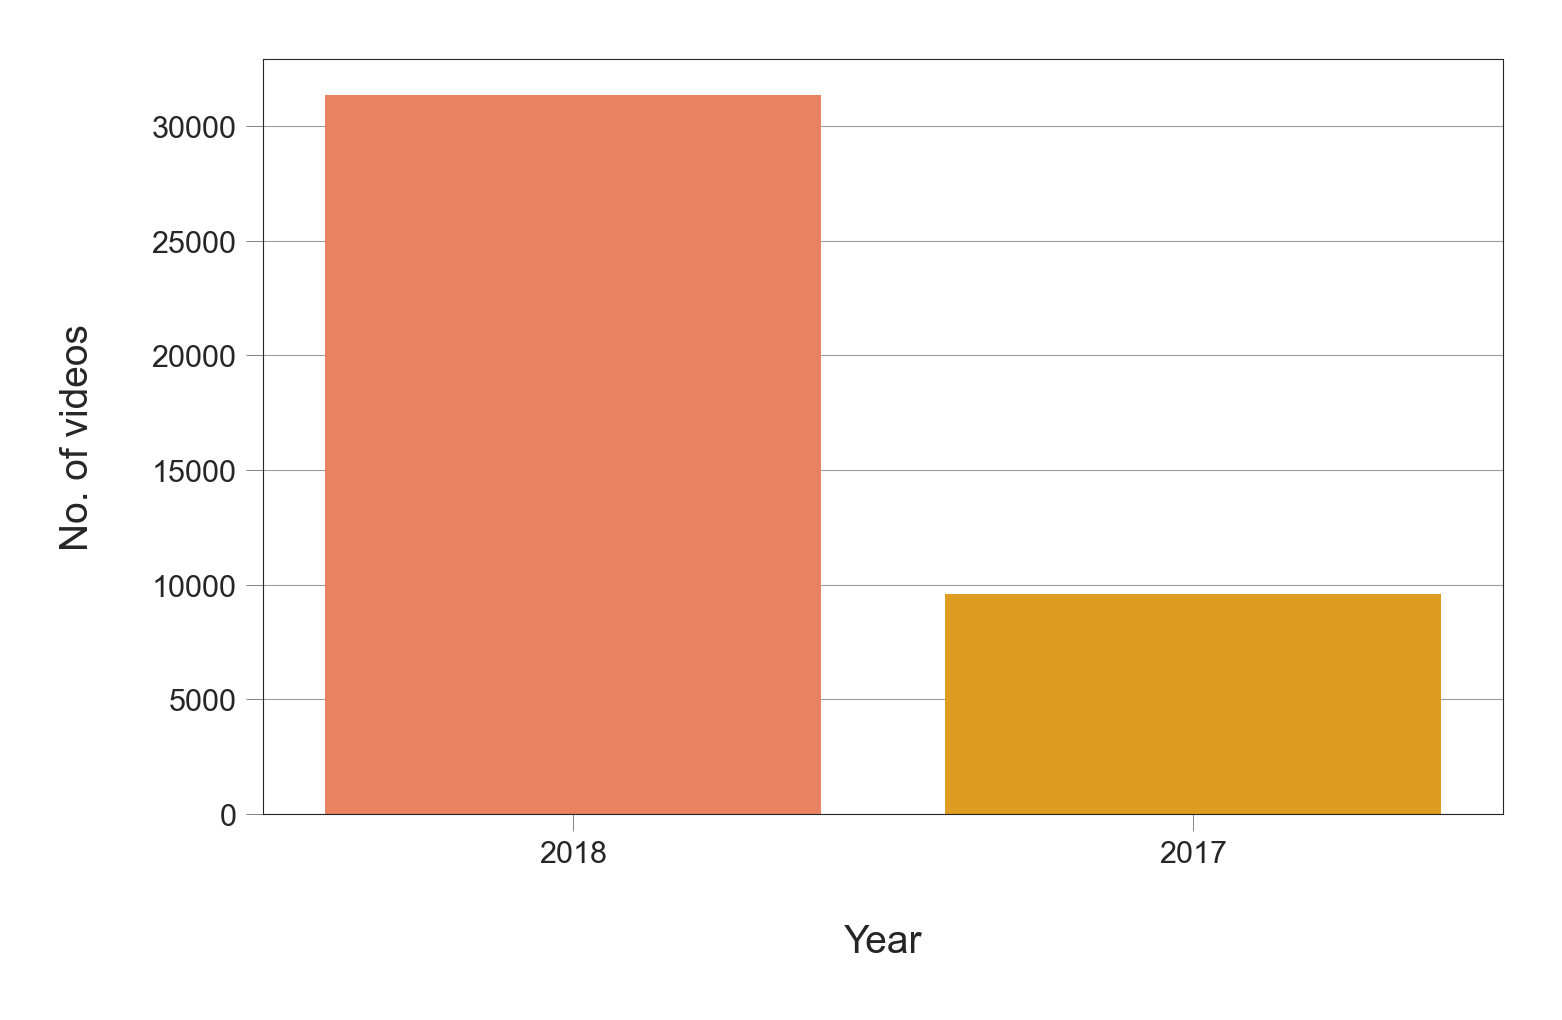

In [11]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [52]:
display(HTML('<p><h4>From the dataset, we can see in which years the dataset was collected.We can see year 2017, there are 10000 or less number of videos and 30000 or more number of videos in 2018.</h4></p>'))

In [34]:
display(HTML('<p><h4><center>Number Of Views</center></h4></p>'))

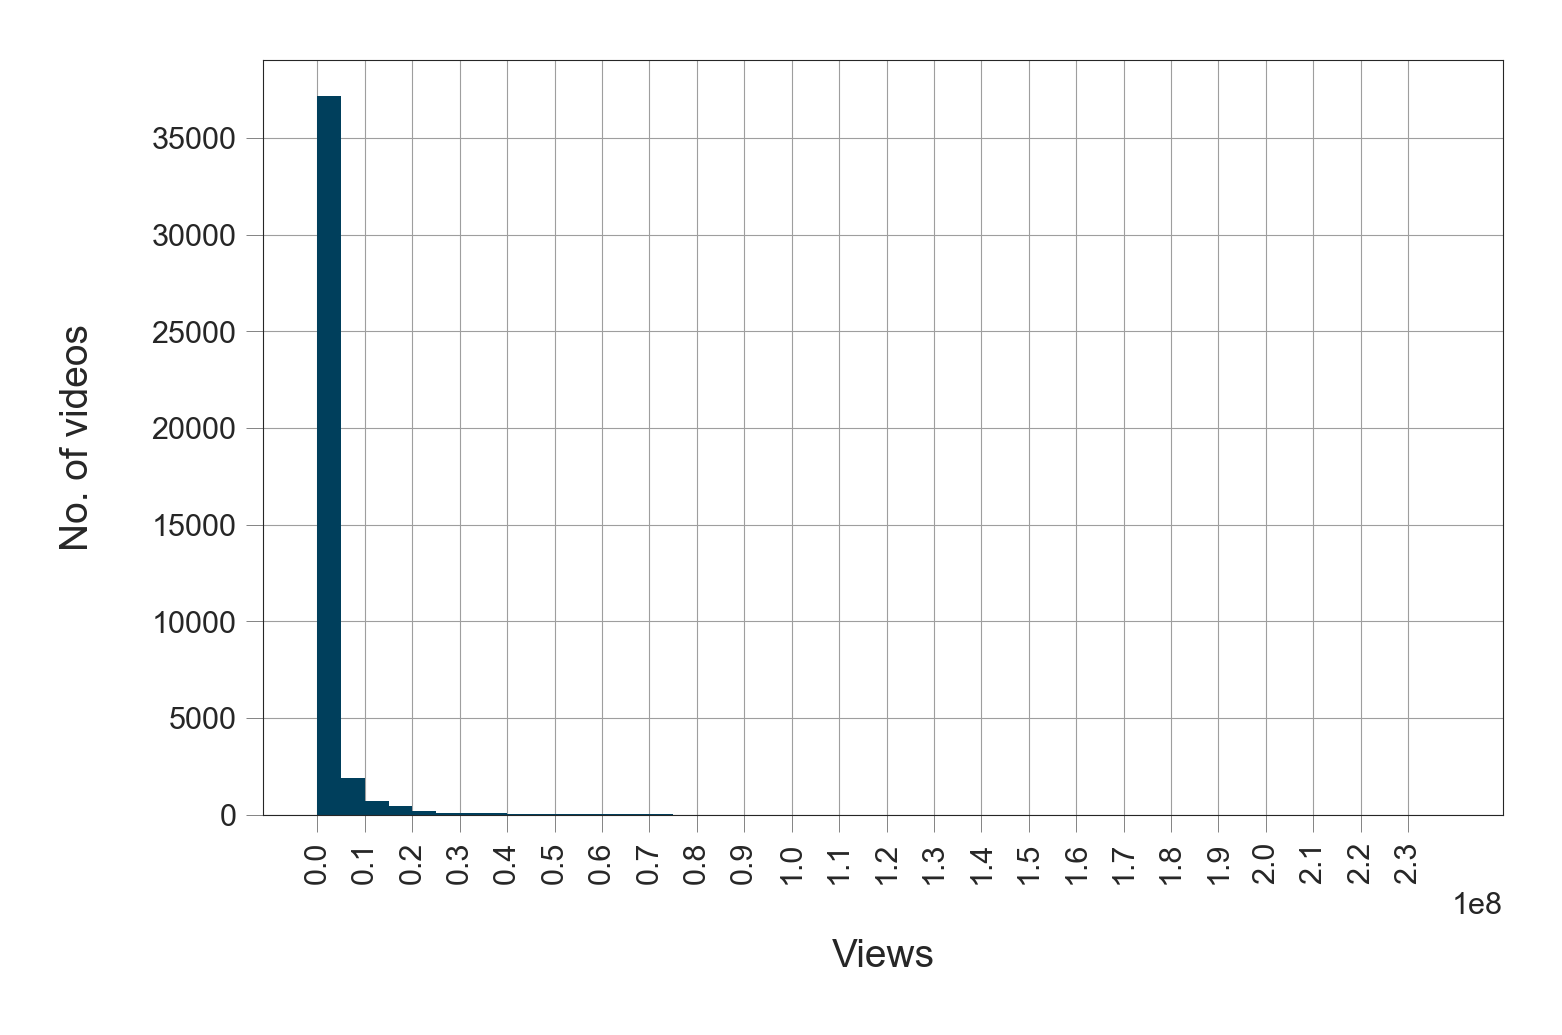

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

In [50]:
display(HTML('<p><h4>From the dataset, we can see the plot of histogram for the views column to take look of its distribution.The histogram show us the overall of the data views to see how many videos have between 10 millions to 20 million views and so on.We can see that only 25 millions views or less from distribution of the data.</h4></p>'))

In [35]:
display(HTML('<p><h4><center>Number Of Less Than 25millions View</center></h4></p>'))

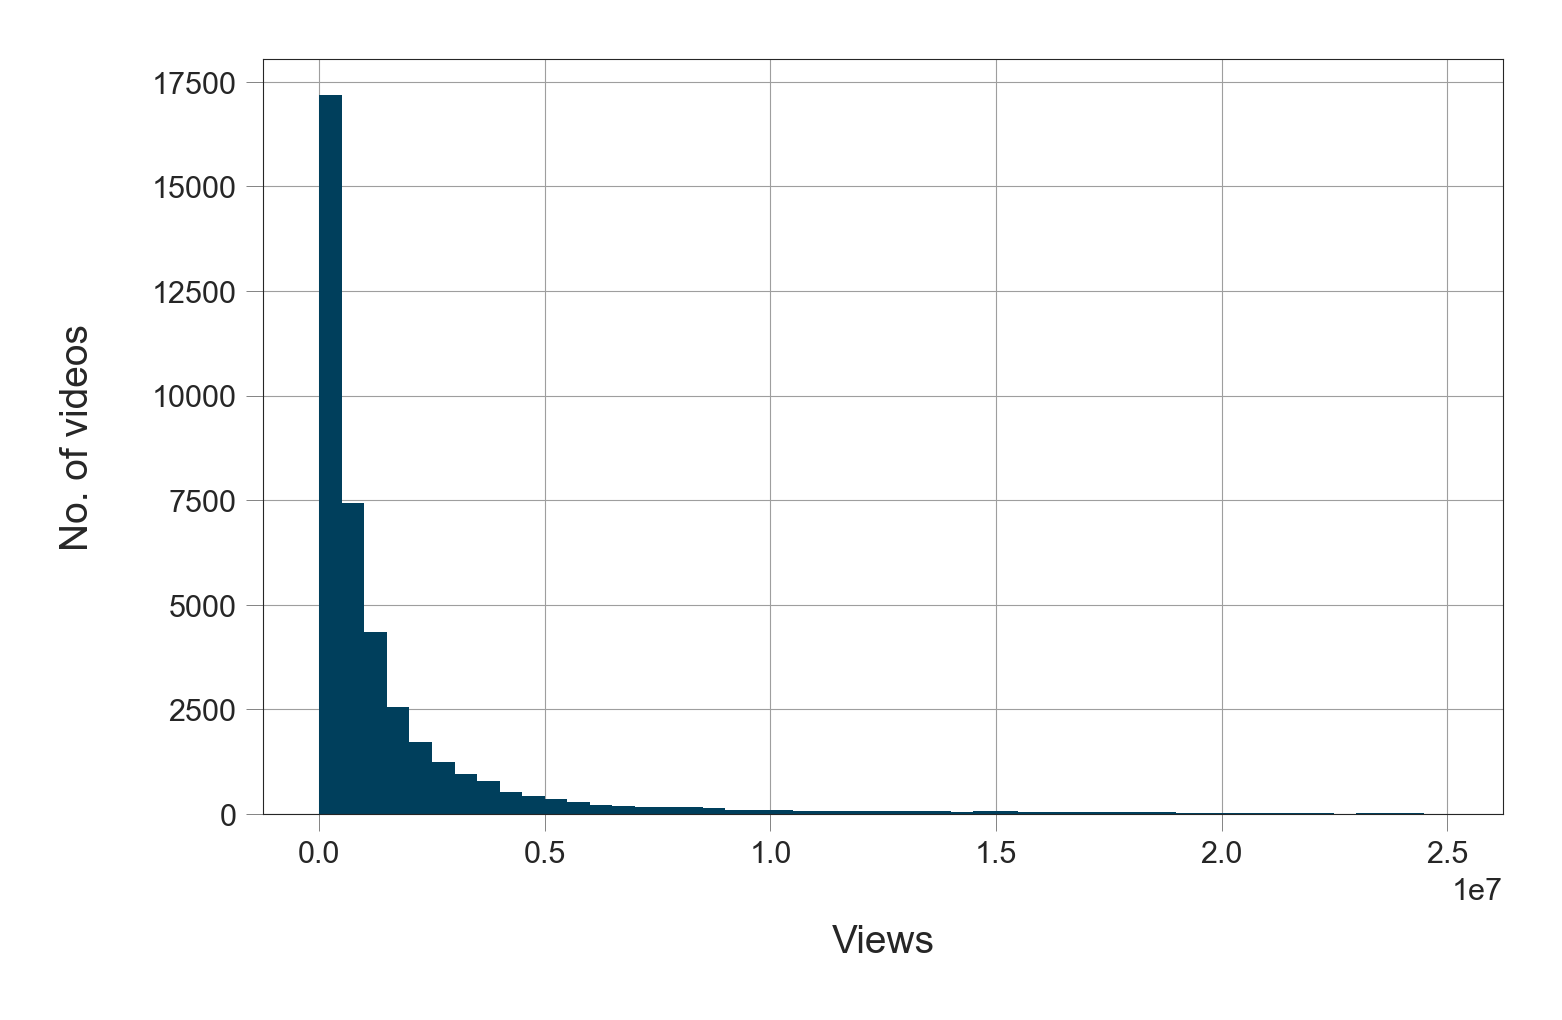

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [51]:
display(HTML('<p><h4>Now we can see the plot of histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.Now we see that the majority of trending videos have 1 million views or less</h4></p>'))

In [36]:
display(HTML('<p><h4><center>Number Of Likes</center></h4></p>'))

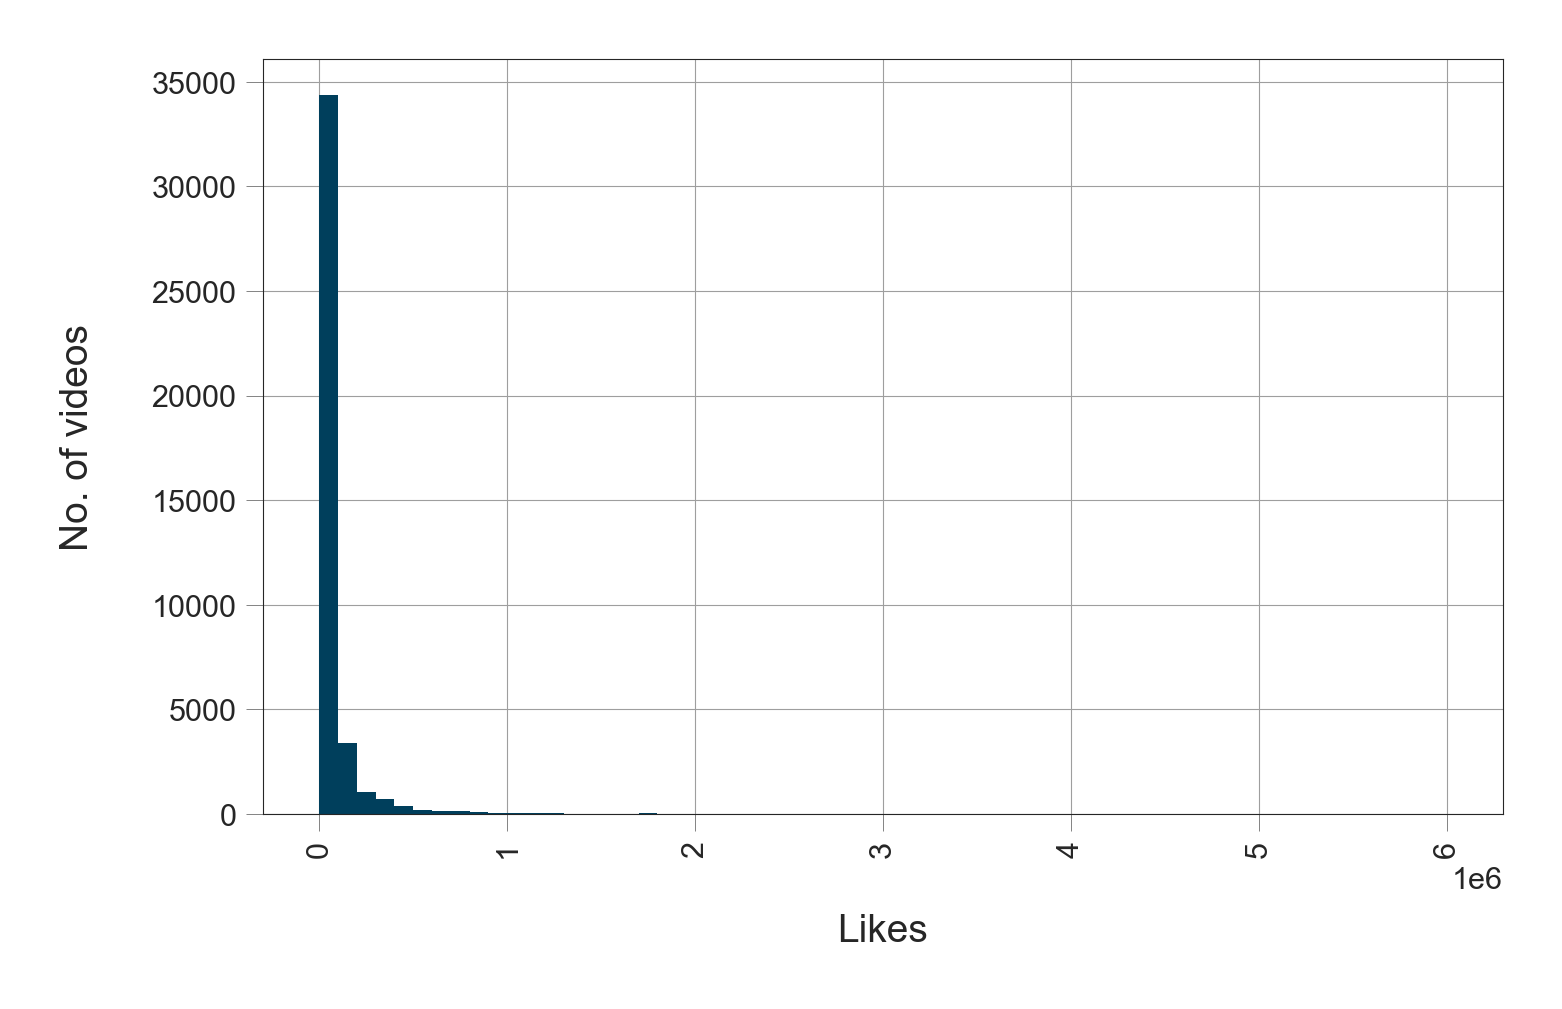

In [17]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

In [54]:
display(HTML('<p><h4>After that, we can see the plot of histogram for likes column from the dataset.We can see 1 Million likes or less that look closer from the distribution of the data.</h4></p>'))

In [37]:
display(HTML('<p><h4><center>Number Of Likes Less Than 100,000 </center></h4></p>'))

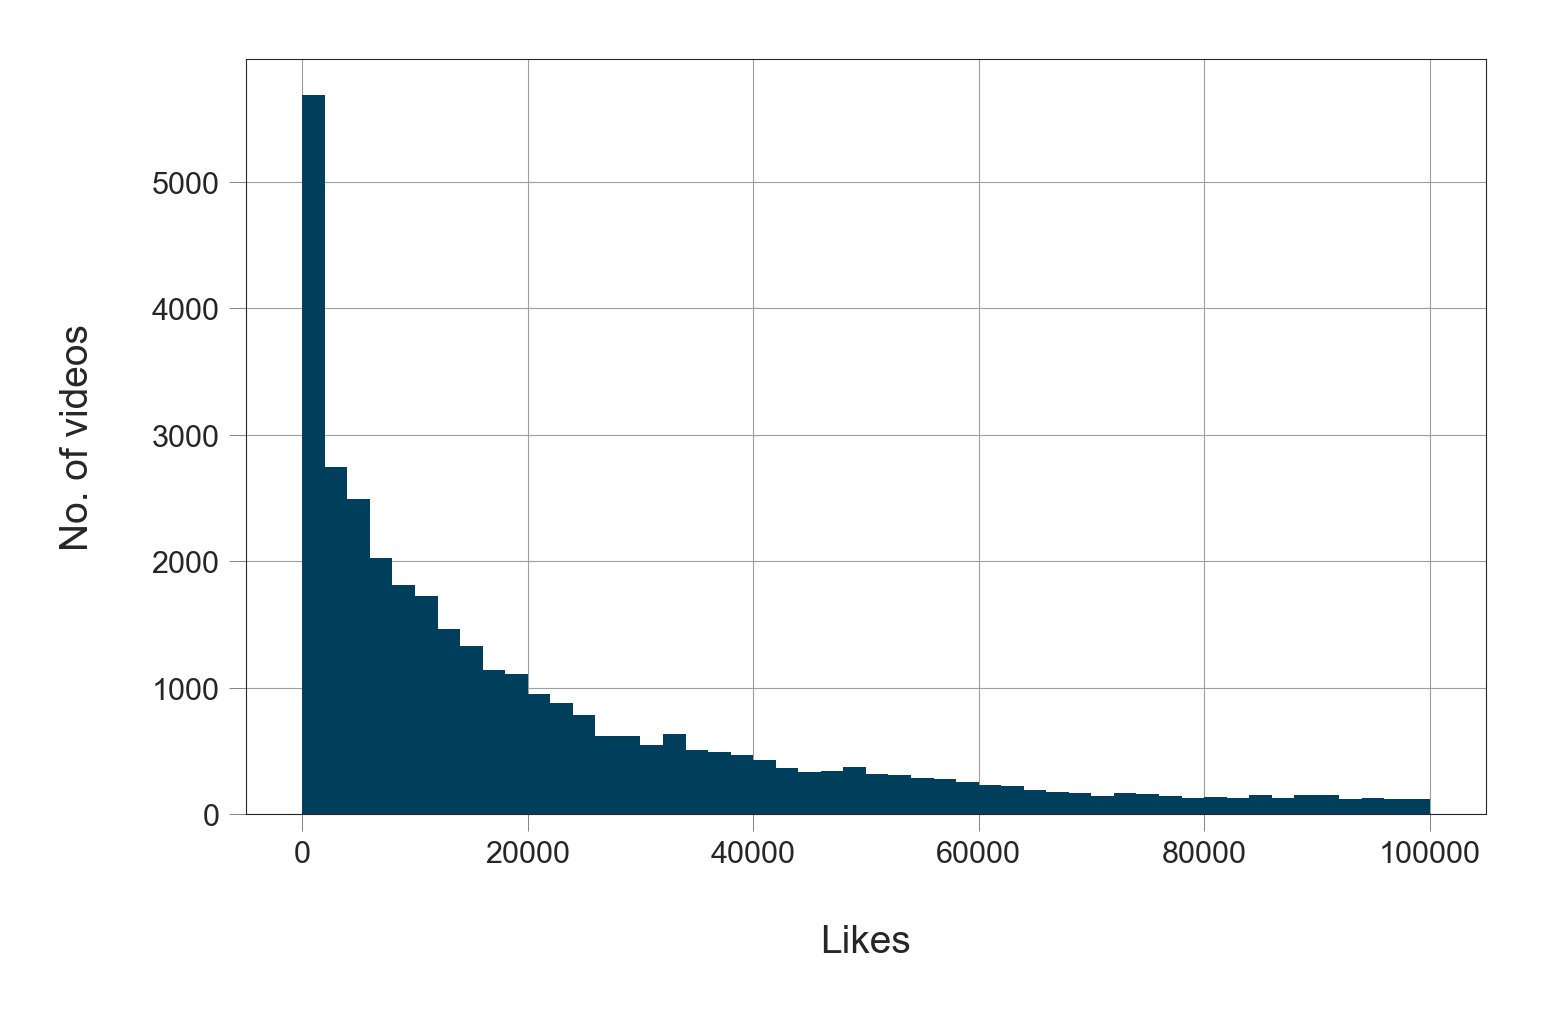

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [53]:
display(HTML('<p><h4>We note that the vast majority of trending videos have between 0 and 100,000 likes.From the histogram, we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.</h4></p>'))

In [38]:
display(HTML('<p><h4><center>Correlation Table</center></h4></p>'))

In [21]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00


In [55]:
display(HTML('<p><h4>Now, we can see the dataset variables are correlated each other.Correlation represented as a value beetween -1 and +1 where +1 denotes as the highest positive correlation, -1 denotes the highest negative correlation and 0 denotes that there is no correlation.From the table, we can see that views and likes are highly positively correlated with a correaltion value of 0.85.To prove the correlation more clearly.We can see by using heatmap and scatter plot.</h4></p>'))

In [39]:
display(HTML('<p><h4><center>Heatmap for Correlation Table Visualization</center></h4></p>'))

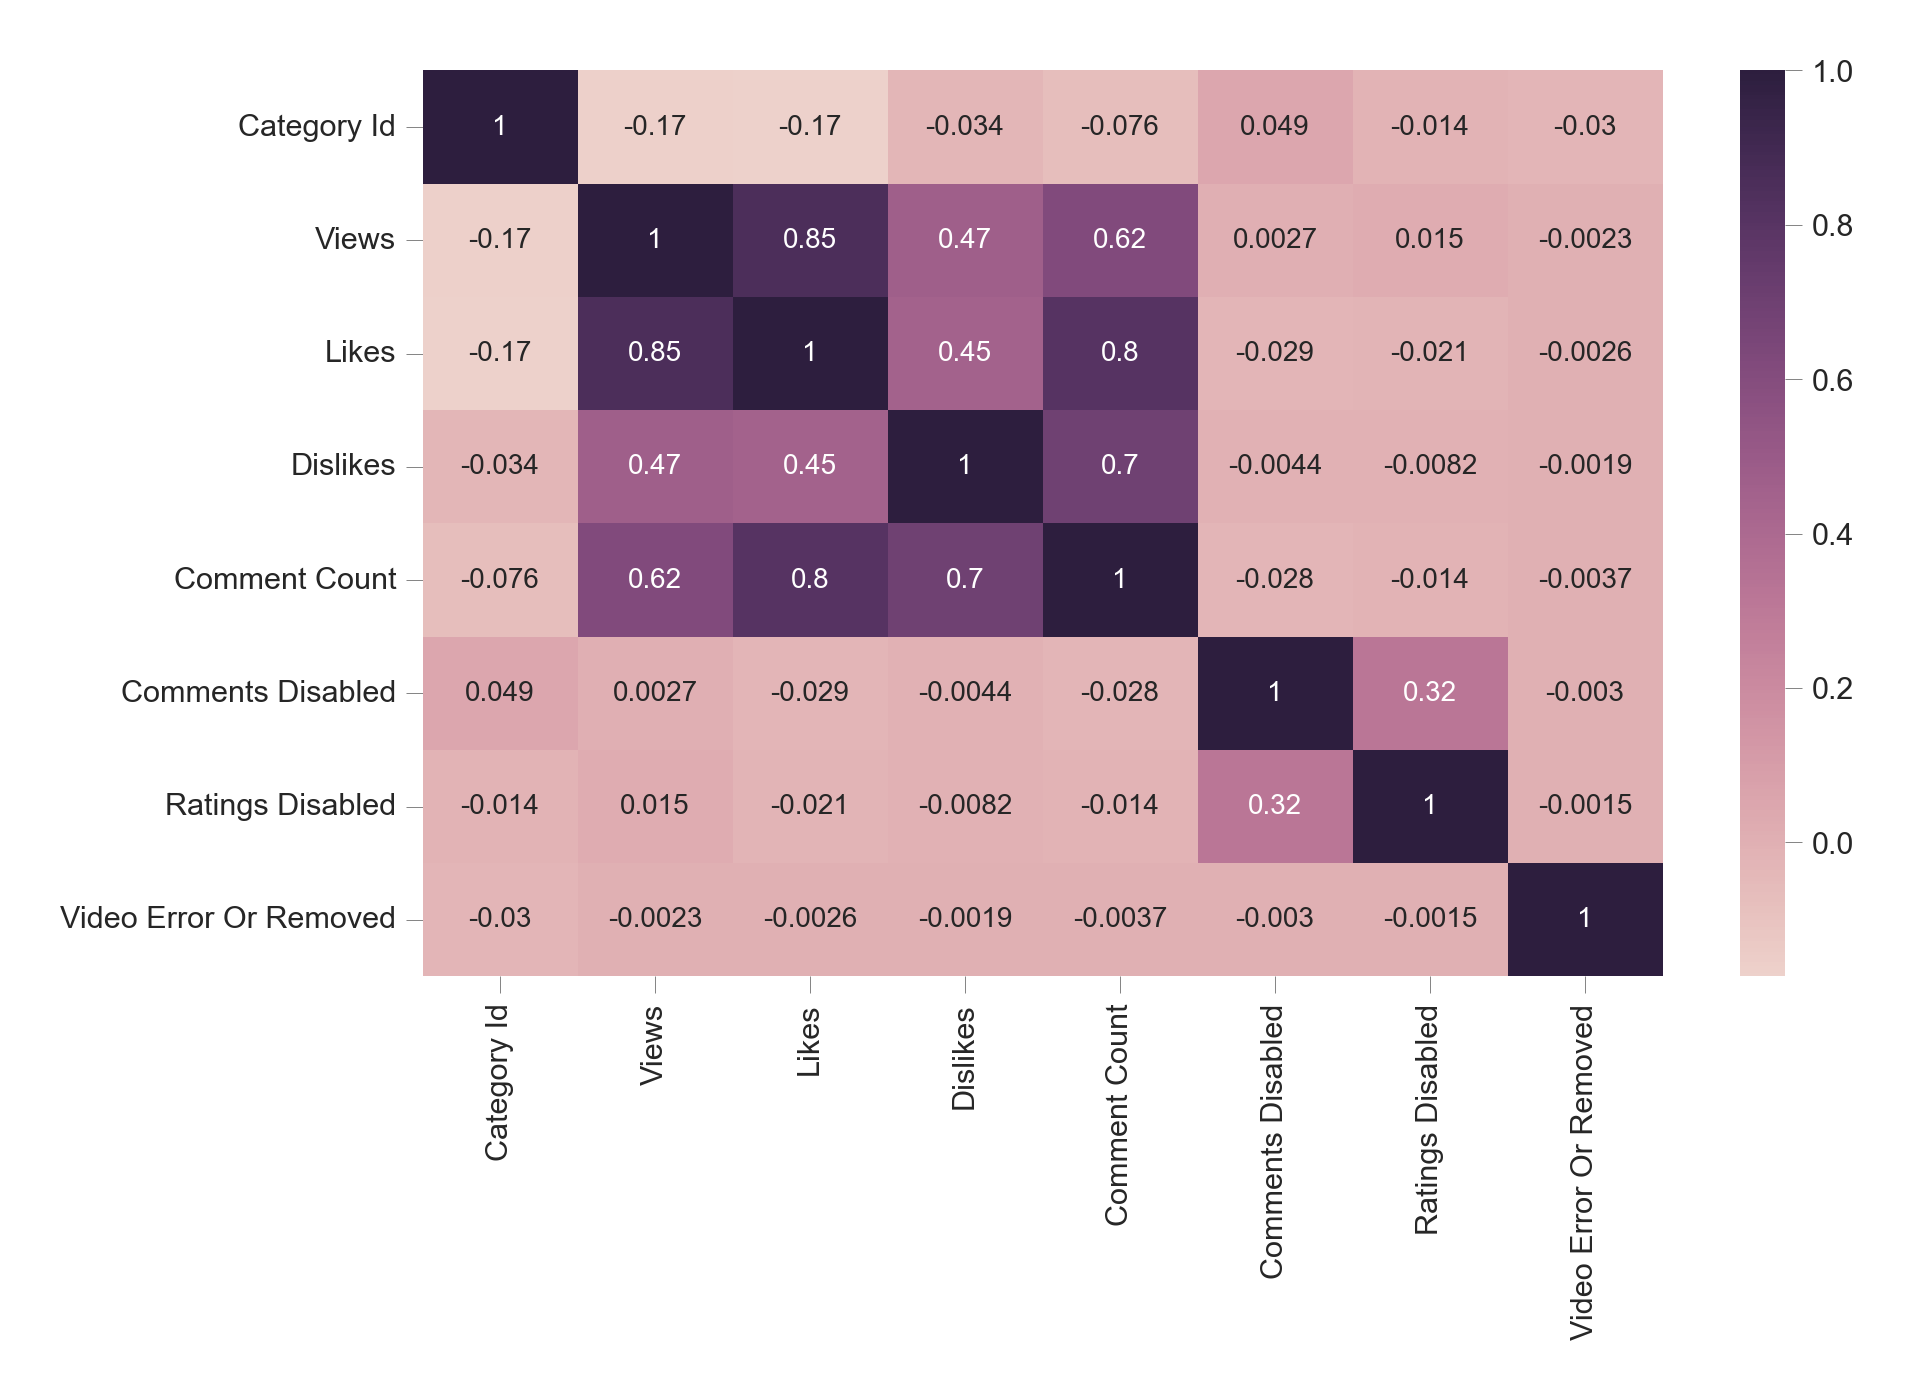

In [23]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [57]:
display(HTML('<p><h4>From the heatmap, we can see that views and likes are highly correlated which a correaltion value is 0.85.</h4></p>'))

In [41]:
display(HTML('<p><h4><center>Scatter Plot Realtionship Between Views And Likes</center></h4></p>'))

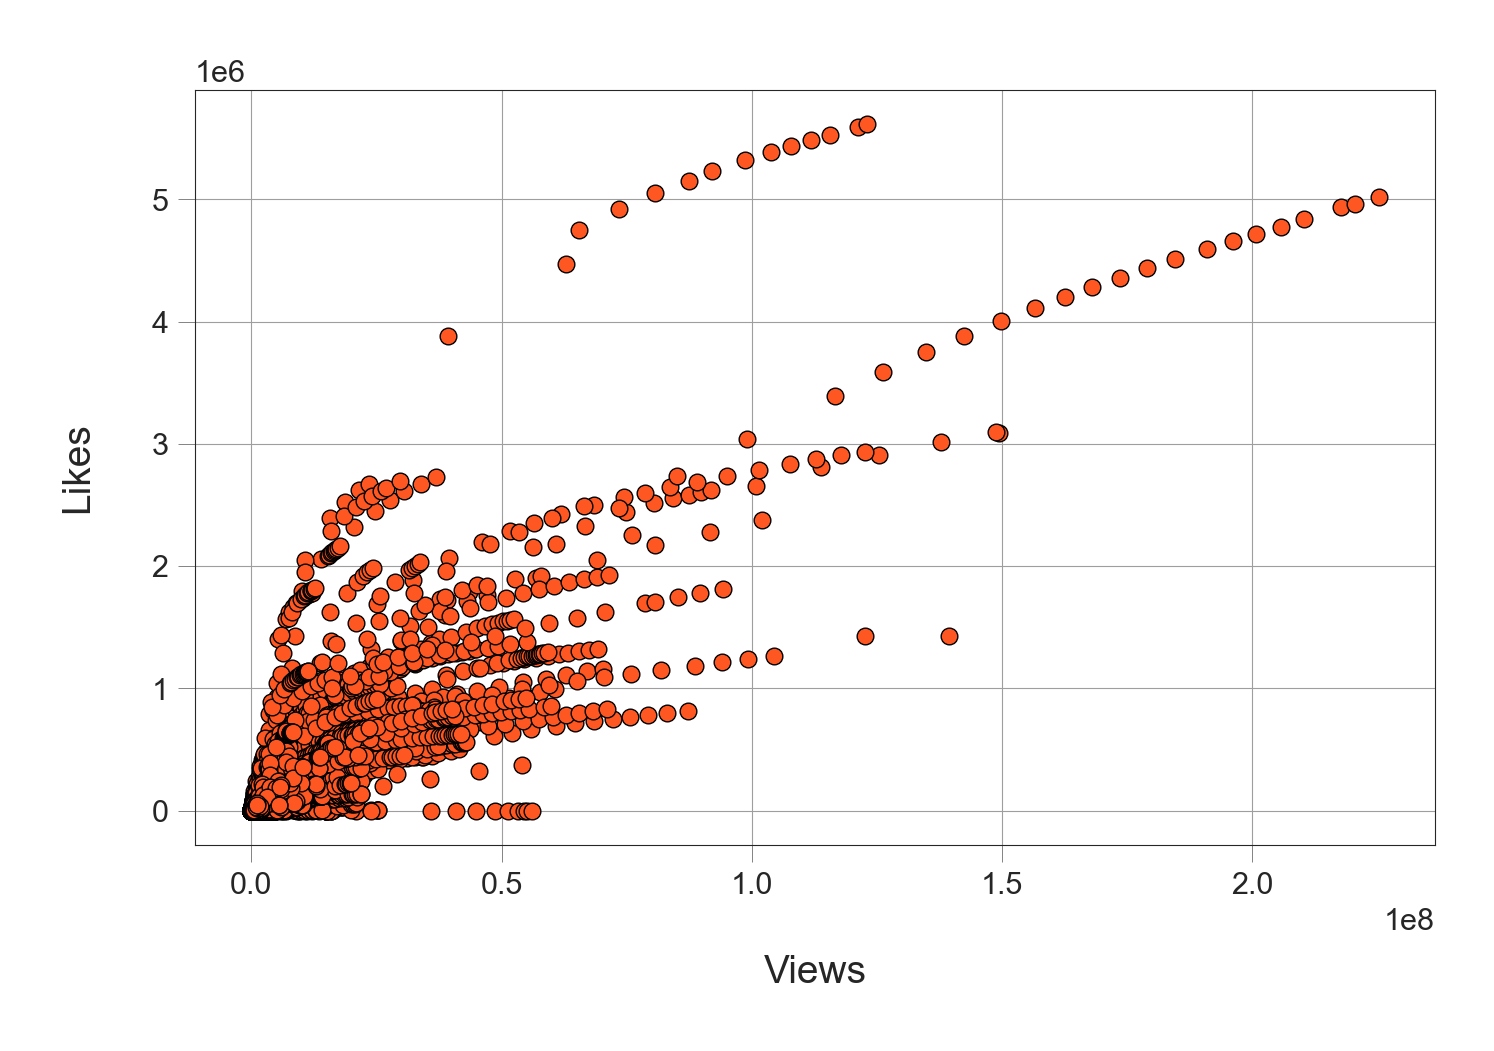

In [25]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [59]:
display(HTML('<p><h4>From the scatter plot, we can see views and likes are truly positively correlated which is we can conclude from as one increases, the other increases too.</h4></p>'))

In [42]:
display(HTML('<p><h4><center>The Channel With The Largest Number Of Trending Videos</center></h4></p>'))

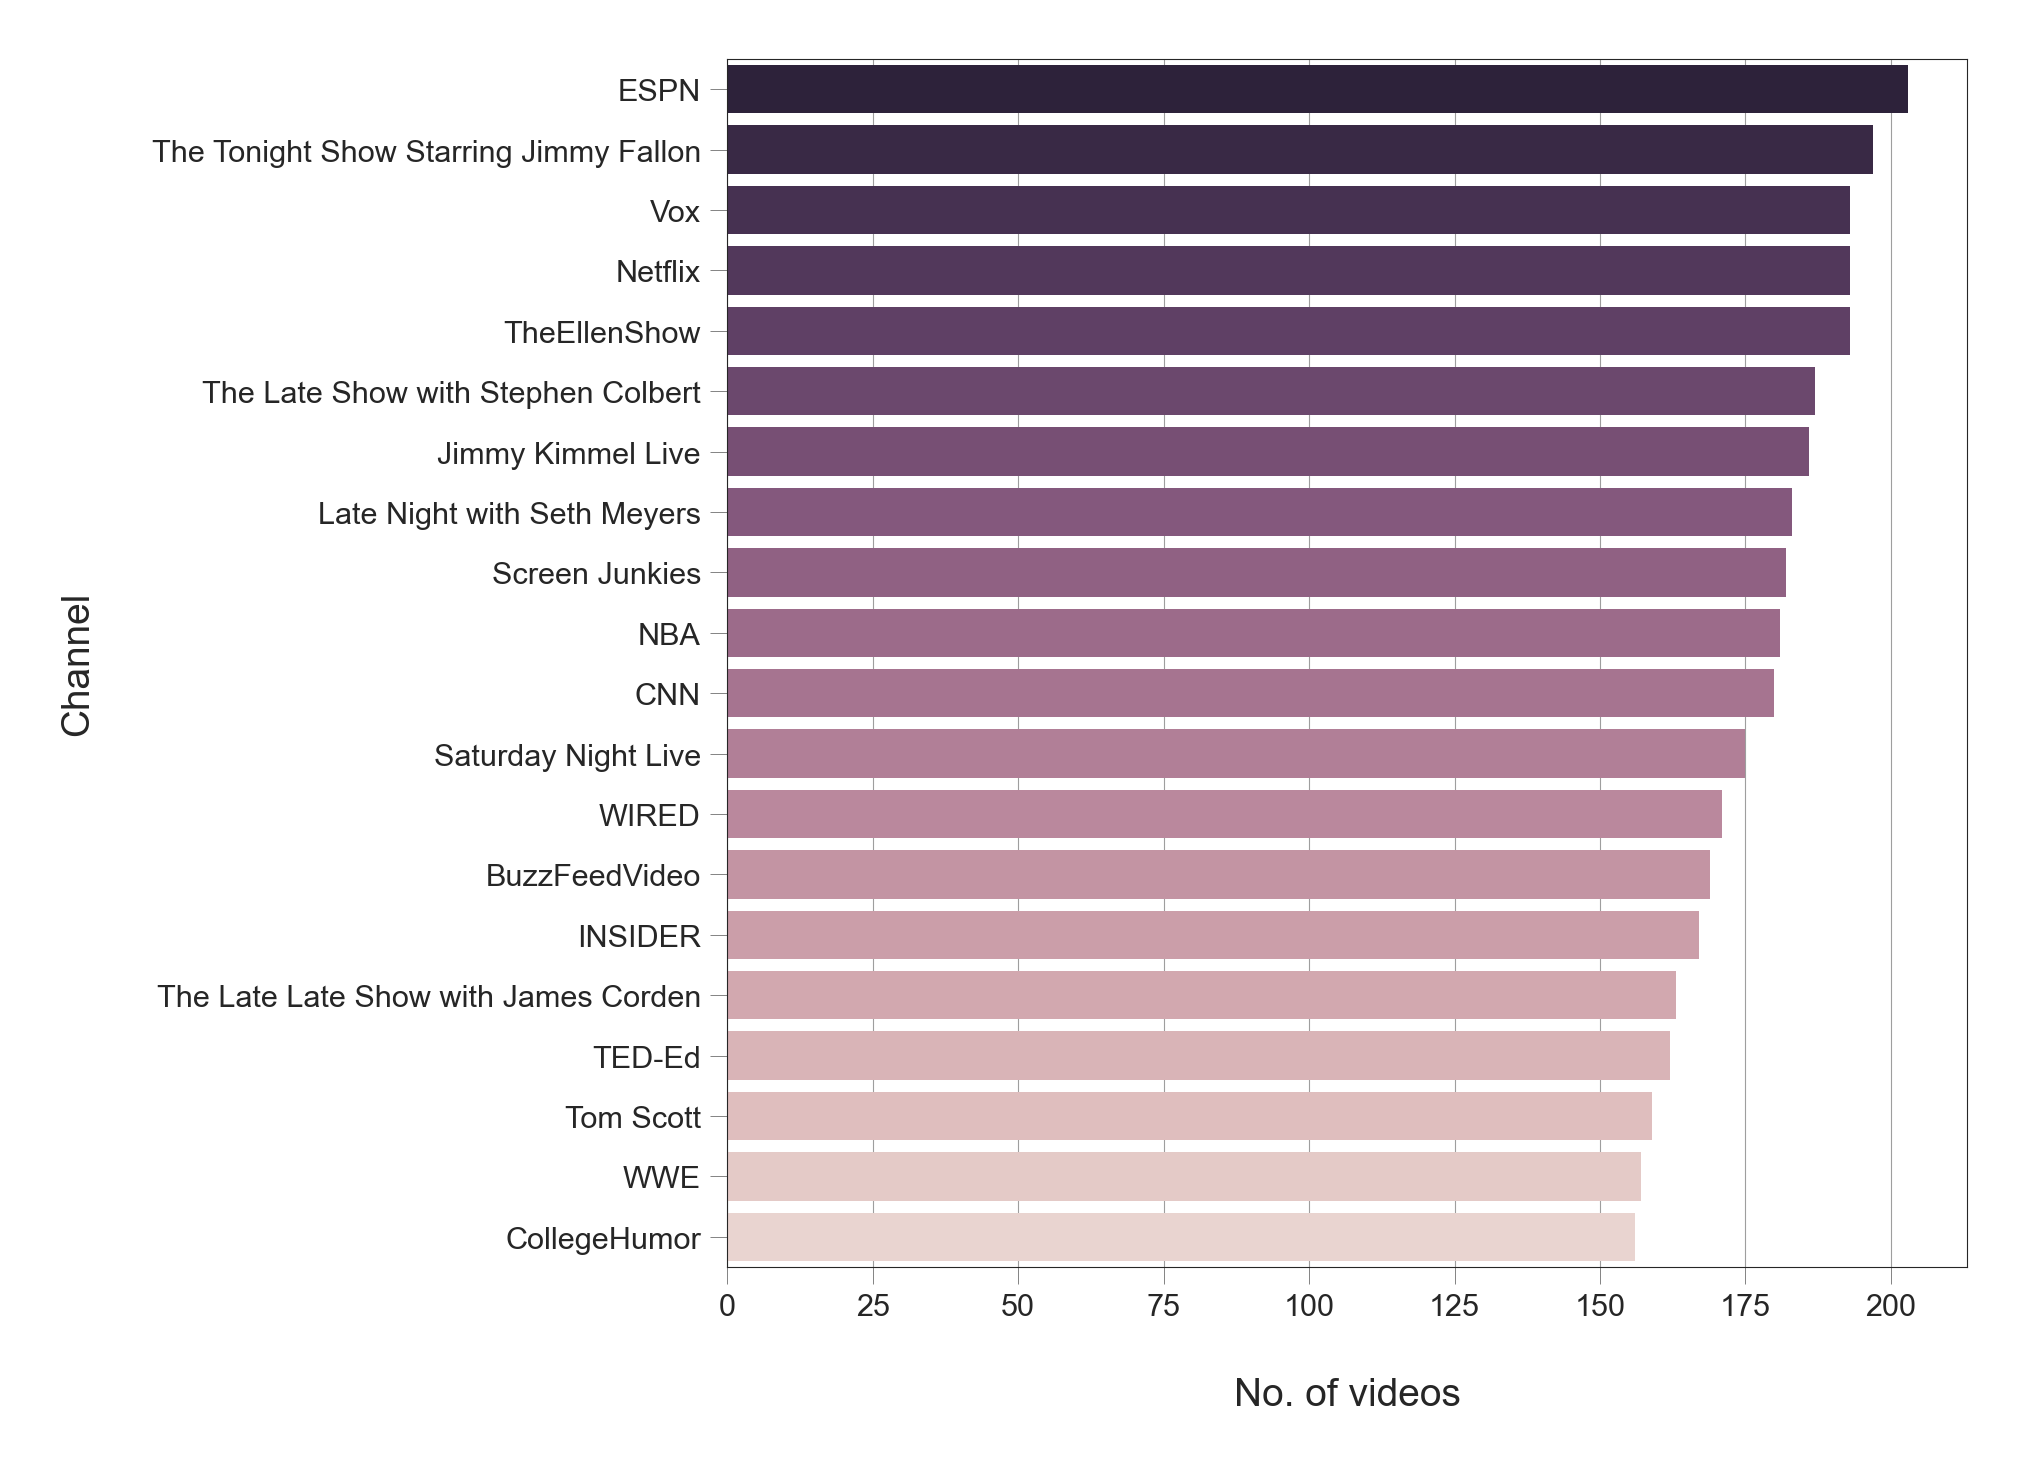

In [27]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [60]:
display(HTML('<p><h4>There are many channel in the dataset.From the histogram it will help us to identify which channels have the largest number of trending videos.We can see that ESPN have the largest number of trending videos which is 200 or more number of videos and CollegeHumor is the lowest which is 150 or more number of videos.  .</h4></p>'))

In [43]:
display(HTML('<p><h4><center>The Category With The Largest Number Of Trending Videos</center></h4></p>'))

In [29]:
with open("C:/Users/NIK HAFIFI BIN MAMAT/Desktop/Python Dataset/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)


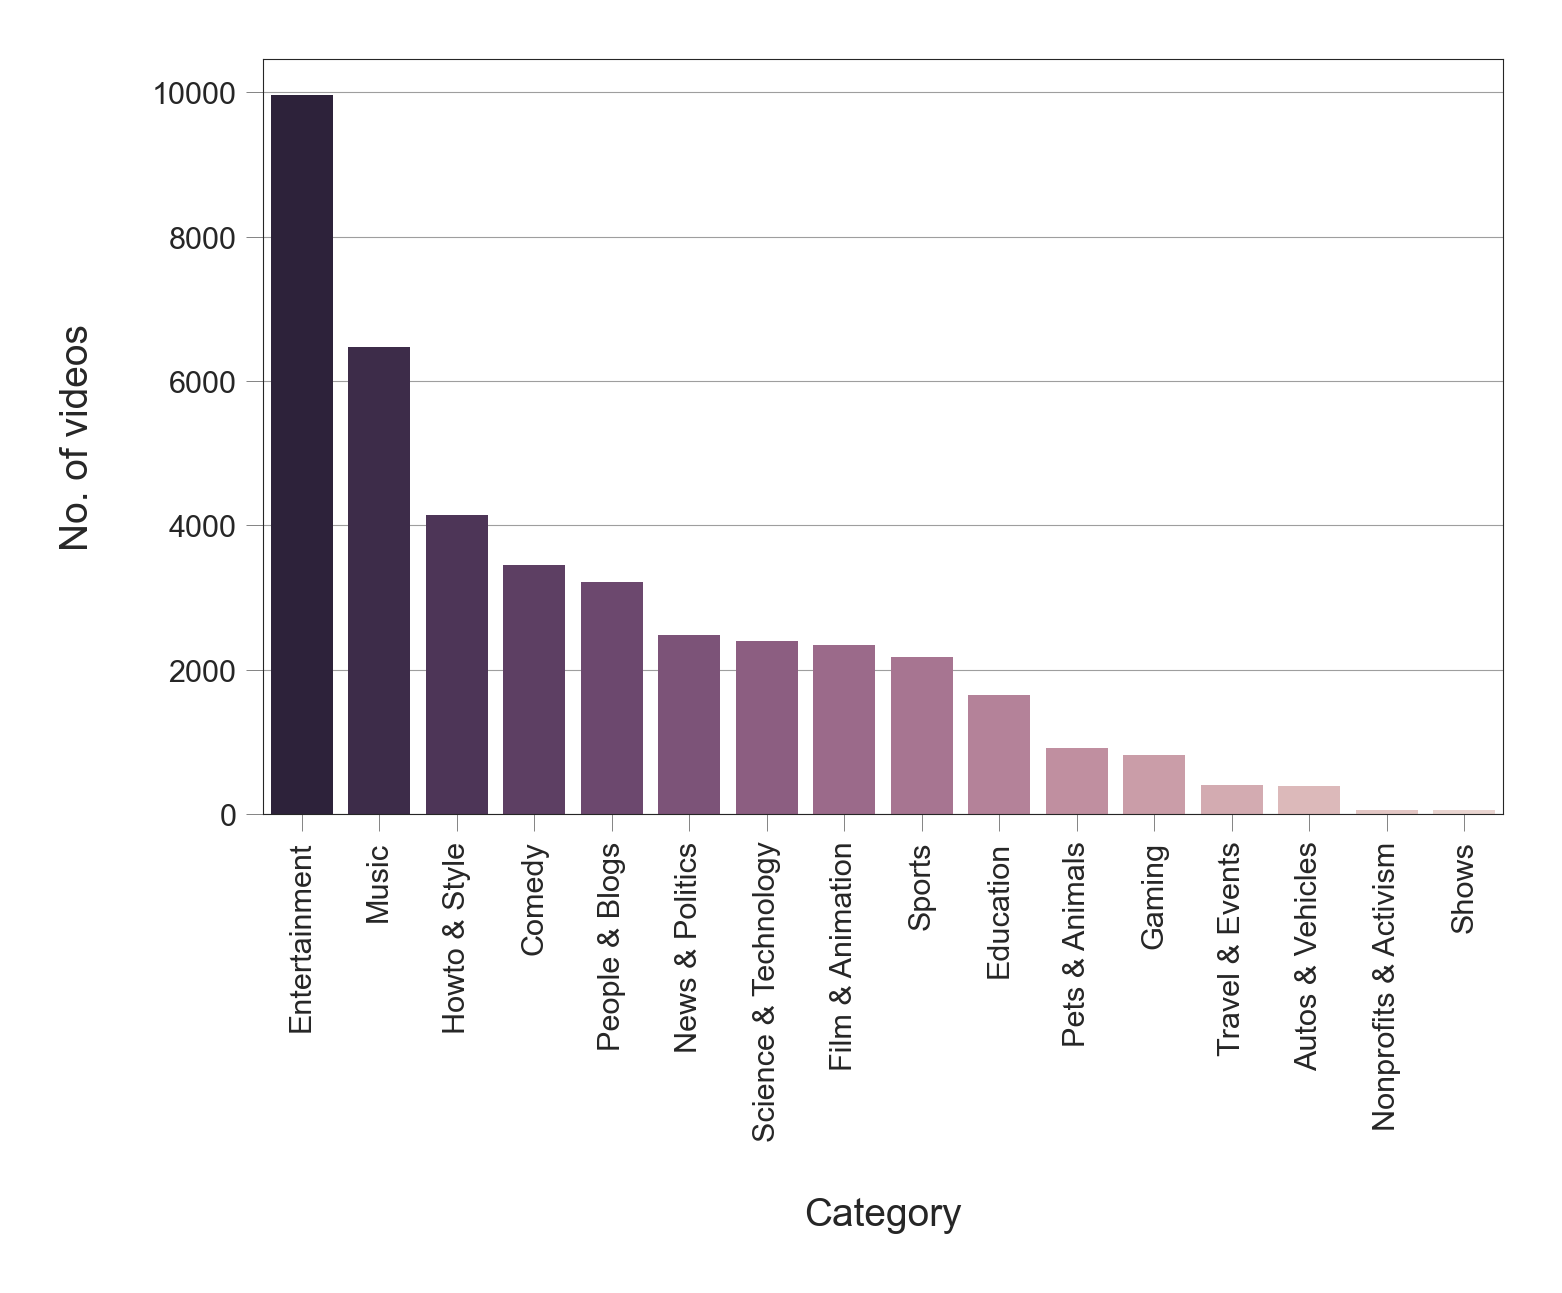

In [30]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [61]:
display(HTML('<p><h4>Lastly, we can see the category which is contain the largest number of trending videos.From the histogram, the entertainment category contains the largest number of trending videos which around 10000 videos followed by Music category with around 6,200 videos followed by Howto & Style category with around 4,100 videos and so on</h4></p>'))